In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

## Per-class IoU and Accuracy

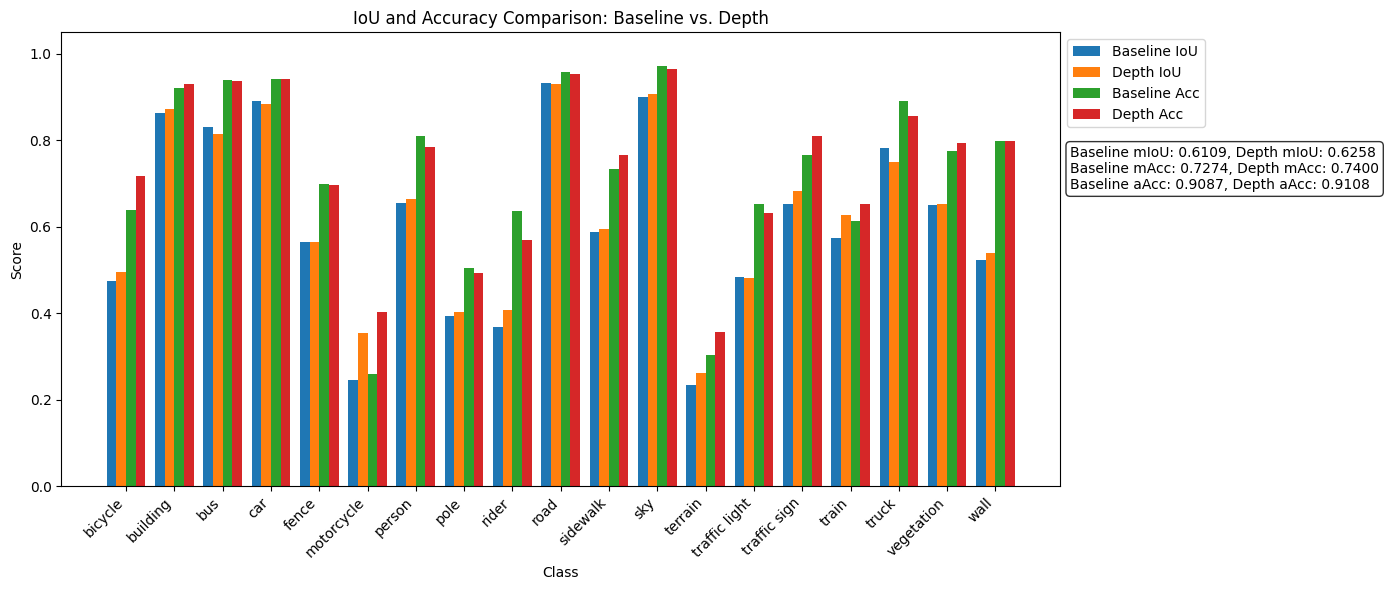

In [16]:
# load json
with open("results/night_base_25k/test_22k.json", "r") as f:
    baseline_data = json.load(f)
with open("results/night_depth_28k/test_depth_28k.json", "r") as f:
    depth_data = json.load(f)

# extract metrics
baseline_metrics = baseline_data["metric"]
depth_metrics = depth_data["metric"]

# overall metrics
baseline_overall = {
    "mIoU": baseline_metrics["mIoU"],
    "mAcc": baseline_metrics["mAcc"],
    "aAcc": baseline_metrics["aAcc"],
}
depth_overall = {
    "mIoU": depth_metrics["mIoU"],
    "mAcc": depth_metrics["mAcc"],
    "aAcc": depth_metrics["aAcc"],
}

# per-class iou and accuracy
baseline_iou = {k.replace("IoU.", ""): v for k, v in baseline_metrics.items() if k.startswith("IoU.")}
baseline_acc = {k.replace("Acc.", ""): v for k, v in baseline_metrics.items() if k.startswith("Acc.")}
depth_iou = {k.replace("IoU.", ""): v for k, v in depth_metrics.items() if k.startswith("IoU.")}
depth_acc = {k.replace("Acc.", ""): v for k, v in depth_metrics.items() if k.startswith("Acc.")}

# sort class names
classes = sorted(baseline_iou.keys())

# create value arrays
baseline_iou_vals = [baseline_iou[c] for c in classes]
depth_iou_vals = [depth_iou[c] for c in classes]
baseline_acc_vals = [baseline_acc[c] for c in classes]
depth_acc_vals = [depth_acc[c] for c in classes]

# create plot
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

# define iou bars
ax.bar(x - 1.5 * width, baseline_iou_vals, width, label='Baseline IoU')
ax.bar(x - 0.5 * width, depth_iou_vals, width, label='Depth IoU')

# define accuracy bars
ax.bar(x + 0.5 * width, baseline_acc_vals, width, label='Baseline Acc')
ax.bar(x + 1.5 * width, depth_acc_vals, width, label='Depth Acc')

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('IoU and Accuracy Comparison: Baseline vs. Depth')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha="right")
ax.set_ylim(0, 1.05)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# set text box with summary metrics
textstr = '\n'.join((
    f"Baseline mIoU: {baseline_overall['mIoU']:.4f}, Depth mIoU: {depth_overall['mIoU']:.4f}",
    f"Baseline mAcc: {baseline_overall['mAcc']:.4f}, Depth mAcc: {depth_overall['mAcc']:.4f}",
    f"Baseline aAcc: {baseline_overall['aAcc']:.4f}, Depth aAcc: {depth_overall['aAcc']:.4f}",
))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(1.01, 0.75, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()


In [15]:
# save
fig.savefig("graphs/comparison", bbox_inches='tight', dpi=300)